<a href="https://colab.research.google.com/github/JuanGagoAnalytics/Python/blob/master/HR_Employee_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAMOS LIBRERIAS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


hr=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Employee Churn/WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr=hr.drop(["EmployeeNumber", "Over18","EmployeeCount","StandardHours"], axis=1)
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [ ]:
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

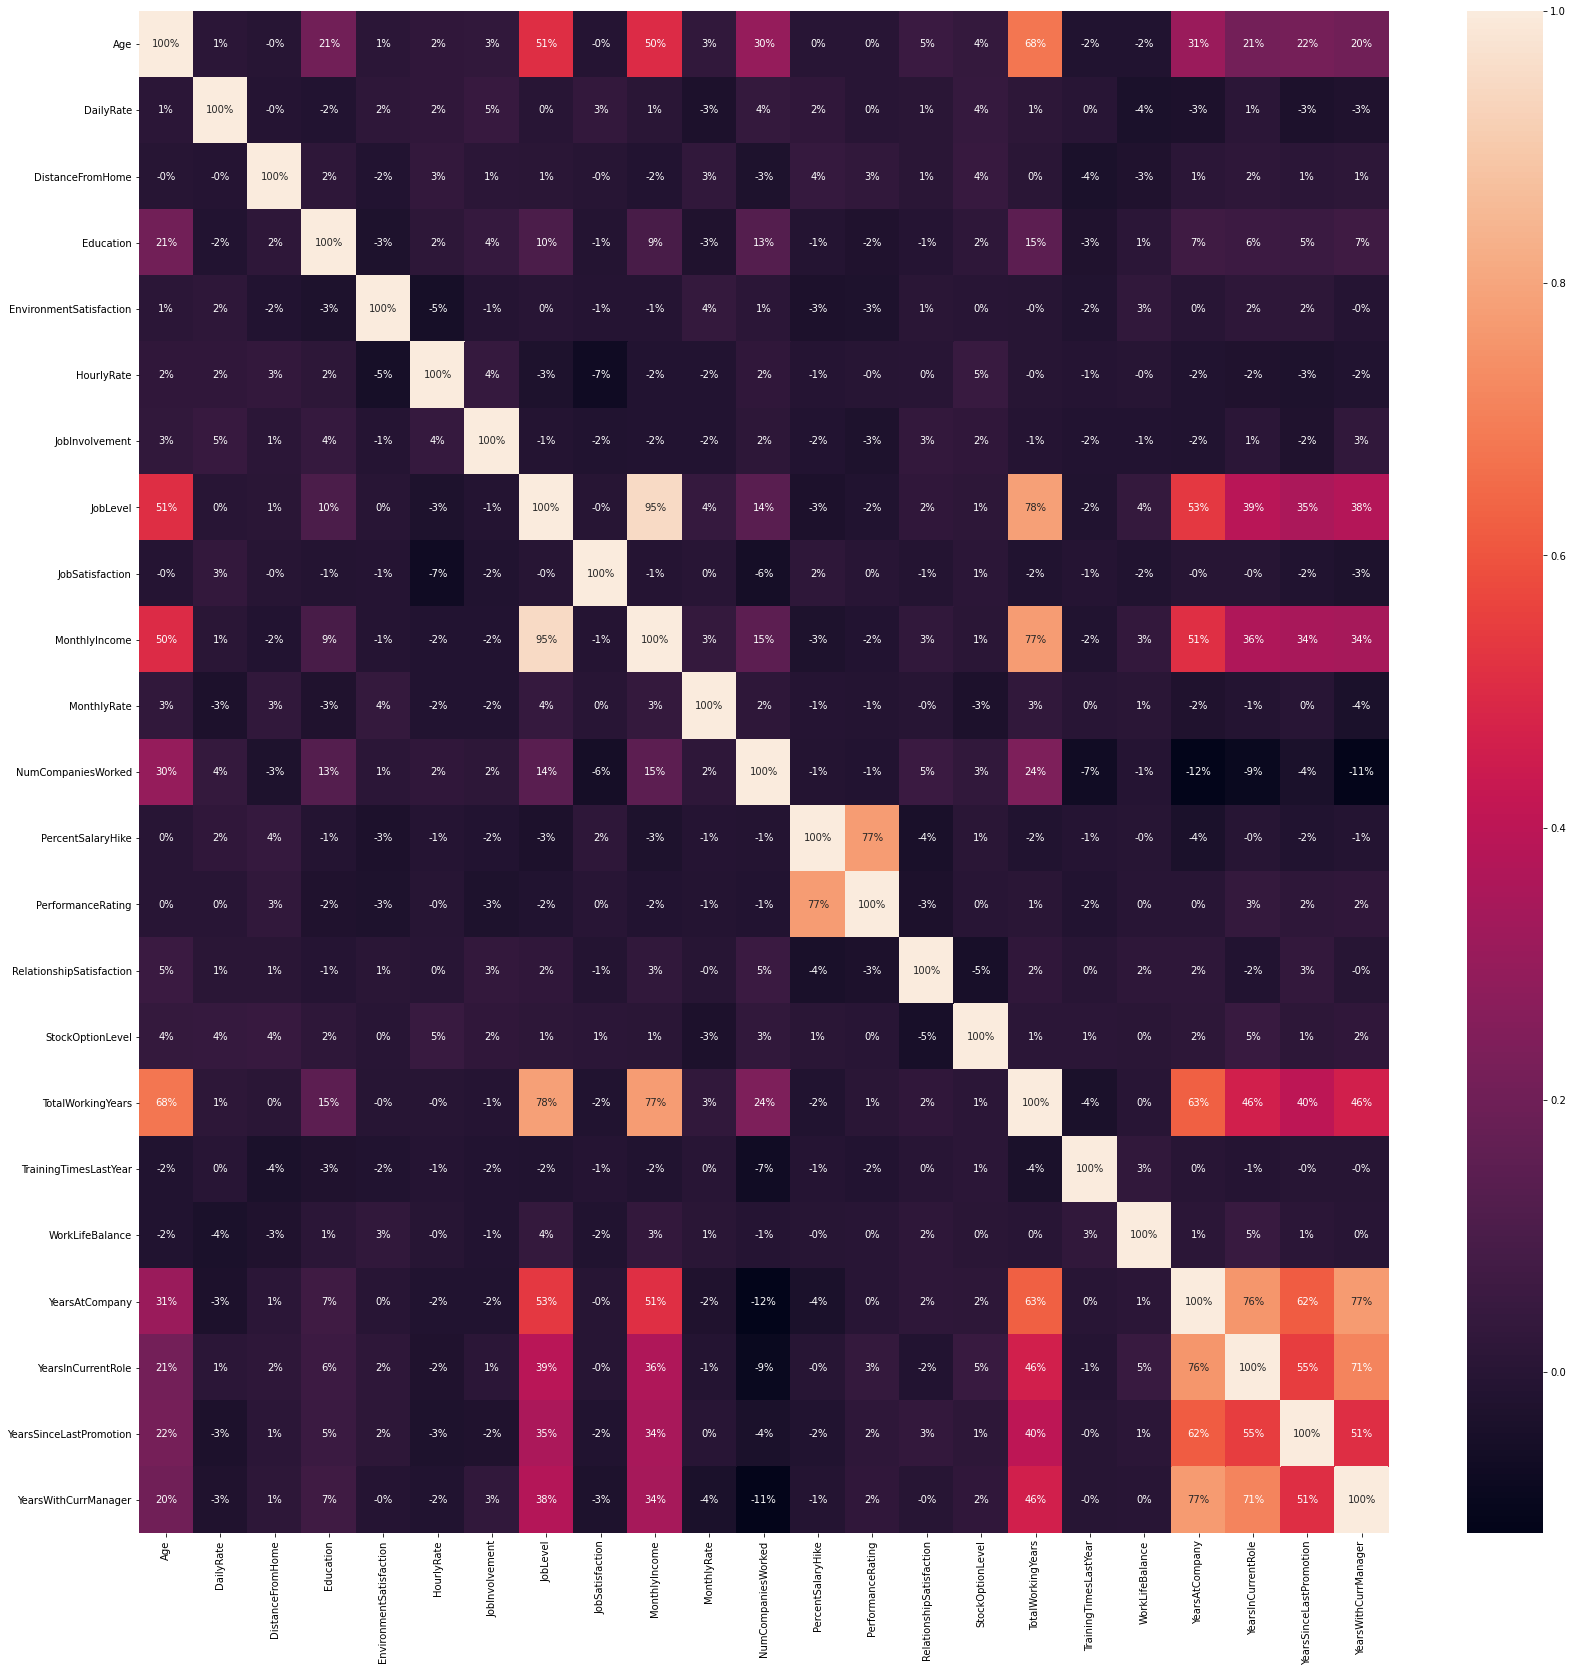

In [ ]:
plt.figure(figsize=(28,28))
sns.heatmap(hr.corr(), annot=True, fmt=".0%")

# **VARIABLES**

## *Age*

In [ ]:
hr.loc[hr["Age"]<18]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
hr.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

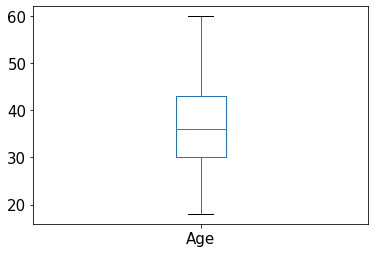

In [ ]:
boxplot1 = hr.boxplot(column= "Age",grid=False, fontsize=15)
boxplot1

## *Attrition*

In [ ]:
hr["Attrition"]=np.where(hr["Attrition"]=="Yes",1,0)

## *Business Travel*

In [ ]:
hr.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
hr_dummy1 = pd.get_dummies(hr['BusinessTravel'])
hr=pd.concat([hr, hr_dummy1], axis=1)
hr=hr.drop("BusinessTravel",axis=1)

## *Daily Rate*

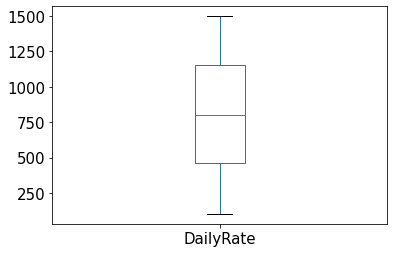

In [ ]:
boxplot2 = hr.boxplot(column= "DailyRate",grid=False, fontsize=15)
boxplot2

## *Department*

In [ ]:
hr.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
hr_dummy2 = pd.get_dummies(hr['Department'])
hr=pd.concat([hr, hr_dummy2], axis=1)
hr=hr.drop("Department",axis=1)

## *Education Field*

In [ ]:
hr.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
hr_dummy3 = pd.get_dummies(hr['EducationField'])
hr=pd.concat([hr, hr_dummy3], axis=1)
hr=hr.drop("EducationField",axis=1)

## *Gender*

In [ ]:
hr.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
hr_dummy4 = pd.get_dummies(hr['Gender'])
hr=pd.concat([hr, hr_dummy4], axis=1)
hr=hr.drop("Gender",axis=1)

## *Hourly Rate*

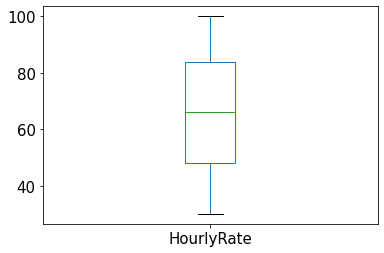

In [ ]:
boxplot3 = hr.boxplot(column= "HourlyRate",grid=False, fontsize=15)
boxplot3

## *Job Role*

In [ ]:
hr.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
hr_dummy5 = pd.get_dummies(hr['JobRole'])
hr=pd.concat([hr, hr_dummy5], axis=1)
hr=hr.drop("JobRole",axis=1)

## *Marital Status*

In [ ]:
hr[["MaritalStatus"]]

,MaritalStatus
0,Single
1,Married
2,Single
3,Married
4,Married
...,...
1465,Married
1466,Married
1467,Married
1468,Married


In [ ]:
hr_dummy5 = pd.get_dummies(hr['MaritalStatus'])
hr=pd.concat([hr, hr_dummy5], axis=1)
hr=hr.drop("MaritalStatus",axis=1)

In [ ]:
hr_dummy5

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,1,0


## *Monthly Income*

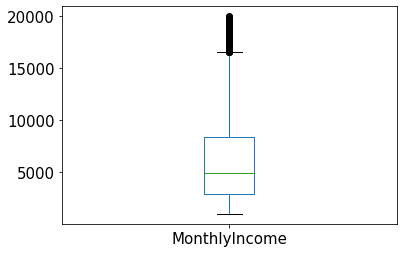

In [ ]:
boxplot4 = hr.boxplot(column= "MonthlyIncome",grid=False, fontsize=15)
boxplot4

In [ ]:
Q1, Q3 = np.percentile(hr["MonthlyIncome"], [25, 75])
distancia = 1.5 * (Q3 - Q1) 
print (Q1,Q3,distancia)

whis_inf = Q1-distancia 
whis_sup = Q3+distancia
print(whis_inf,whis_sup)

2911.0 8379.0 8202.0
-5291.0 16581.0


In [ ]:
print((hr['MonthlyIncome']> whis_sup).sum())
print((hr['MonthlyIncome']> whis_sup).sum()/hr.shape[0])
print((hr['MonthlyIncome']< whis_inf).sum())
print((hr['MonthlyIncome']< whis_inf).sum()/hr.shape[0])

114
0.07755102040816327
0
0.0


In [ ]:
hr=hr.loc[hr["MonthlyIncome"]<=16581]

##*Monthly Rate*

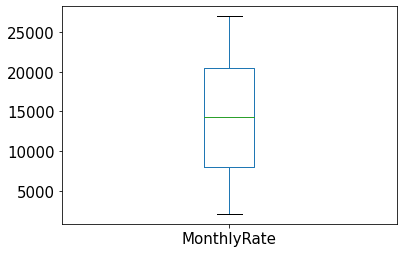

In [ ]:
boxplot5 = hr.boxplot(column= "MonthlyRate",grid=False, fontsize=15)
boxplot5

##*OverTime*

In [ ]:
hr_dummy6 = pd.get_dummies(hr['OverTime'])
hr=pd.concat([hr, hr_dummy6], axis=1)
hr=hr.drop("OverTime",axis=1)

# **MODELO PREDICTIVO**

##*Gridsearch*

In [ ]:
parameter_grid_rf = {
    'max_depth': [1,2,3,4,5],
    'max_features': [0.3, 0.5, 1.],
    'n_estimators': [5, 10, 15]}

parameter_grid_dt = {
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [1, 2, 3]}

grid_search_rf = GridSearchCV(RandomForestClassifier(), parameter_grid_rf,
                            cv=5, verbose=3, refit=True, n_jobs=-1, scoring = "accuracy")

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), parameter_grid_dt,
                            cv=5, verbose=3, refit=True, n_jobs=-1, scoring = "accuracy")

In [ ]:
x=hr.drop(["Attrition"], axis=1)
y=hr["Attrition"]

*Random Forest*

In [ ]:
grid_search_rf.fit(x, y)

In [ ]:
grid_search_rf.best_estimator_

In [ ]:
grid_search_rf.best_params_

In [ ]:
grid_search_rf.best_score_

0.8510418927718689

*Decision Tree*

In [ ]:
grid_search_dt.fit(x, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         

In [ ]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
grid_search_dt.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
grid_search_dt.best_score_

0.8429210983286304

## *Modelo 1*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)

print(x_train.shape[0], x_test.shape[0])

949 407


In [ ]:
rfmod= RandomForestClassifier(max_depth=5, max_features=0.5, n_estimators=10)
rfmod.fit(x_train,y_train)

In [ ]:
rfmod.score(x_test,y_test)

0.8427518427518428

## *Modelo 2*

In [ ]:
dtmod= DecisionTreeClassifier(max_depth= 3, min_samples_split= 2)
dtmod.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtmod.score(x_test,y_test)

0.8157248157248157

## *Matriz de Confusion*

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
pred_rf=rfmod.predict_proba(x_test)
pred_dt=dtmod.predict_proba(x_test)

In [ ]:
def f(punto_corte=0.5):
  y_pred=np.where(pred_rf>punto_corte, 1, 0)
  conf_mat=pd.crosstab(y_test, y_pred[:,1], rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(conf_mat, annot=True, fmt='g')

In [ ]:
interact(f, punto_corte=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='punto_corte', max=1.0, step=0.01), Output()), _dom_c…

# **ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_test))]
rf_probs=pred_rf[:,1]
dt_probs=pred_dt[:,1]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc=roc_auc_score(y_test, rf_probs)
dt_auc=roc_auc_score(y_test, dt_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.735
Decision Tree: AUROC = 0.627


In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

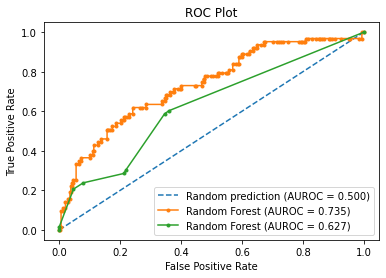

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % dt_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()